In [20]:
import pandas as pd
from histr import Shabdansh

In [14]:
names = pd.read_csv('../naam.csv')

In [27]:
names['name'] = names['name'].map(Shabdansh)

In [33]:
# remove names with only one syllable
names = names[names['name'].map(len) > 1]

In [34]:
words = names.sort_values(by=['count'], ascending=False)['name'][:32000].tolist()

In [35]:
min(len(w) for w in words)

2

In [37]:
max(len(w) for w in words)

10

In [38]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [39]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('न', '<E>'), 3391),
 (('ह', '<E>'), 3223),
 (('र', '<E>'), 2927),
 (('ल', '<E>'), 2430),
 (('रा', 'म'), 2135),
 (('सिं', 'ह'), 1921),
 (('<S>', 'रा'), 1834),
 (('<S>', 'अ'), 1647),
 (('म', '<E>'), 1308),
 (('<S>', 'स'), 1234),
 (('ला', 'ल'), 1180),
 (('सि', 'ह'), 1105),
 (('द', '<E>'), 1104),
 (('<S>', 'म'), 1017),
 (('<S>', 'ज'), 847),
 (('<S>', 'सु'), 832),
 (('<S>', 'र'), 796),
 (('<S>', 'ह'), 752),
 (('पा', 'ल'), 736),
 (('री', '<E>'), 724),
 (('ली', '<E>'), 691),
 (('<S>', 'ब'), 668),
 (('<S>', 'वि'), 646),
 (('<S>', 'क'), 642),
 (('<S>', 'न'), 634),
 (('त', '<E>'), 629),
 (('<S>', 'मु'), 620),
 (('श', '<E>'), 615),
 (('रा', 'ज'), 554),
 (('कु', 'मा'), 538),
 (('ई', '<E>'), 533),
 (('<S>', 'इ'), 517),
 (('ती', '<E>'), 508),
 (('ज', '<E>'), 496),
 (('मा', 'र'), 490),
 (('सा', 'द'), 486),
 (('प्र', 'सा'), 474),
 (('न्द्र', '<E>'), 454),
 (('क', 'र'), 445),
 (('<S>', 'शि'), 435),
 (('दी', 'न'), 435),
 (('<S>', 'प'), 420),
 (('र', 'न'), 420),
 (('रा', 'य'), 419),
 (('थ', '<E>'), 41

In [41]:
import torch

In [45]:
chars_ls = [list(word) for word in words]
chars = []
for ls in chars_ls:
    chars += ls

In [49]:
chars = sorted(list(set(chars)))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [51]:
len(stoi)

1486

In [52]:
N = torch.zeros((len(stoi), len(stoi)), dtype=torch.int32)

In [53]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [60]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000e+00, 5.1469e-02, 9.3750e-05,  ..., 3.1250e-05, 6.2500e-05,
        3.1250e-05])

In [61]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'र'

In [62]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [63]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [64]:
p.shape

torch.Size([3])

In [67]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [68]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

रवार्मेंक्मिक्रेसश्फाक्ष्मिम्ति्यायंम्भन्यस्कम्ब्रीशेाल्तीहुँप्तथ्रव्तेक्शून्हेंल्फिनौंफ्तेर्मीचिंधुल्हुच्चीतृछूआैंम्भिपौफ्फासाेन्यार्फूहेाचोल्तामैन.
ल.
चिंर्भनंेभ्ॉडूधांछेढ़ेत्माढवेंन्तचेद्याीठोन्टीरांर्तीम्पान्टेशेफोदौम्वण्डतौत्यस्मीश्यन्ठील्फअादोंछूघाष्कआेगूछंनीीन्वास्सुल्तगेंधैापॉद्रिबृजंंब्बव्याध्यील्ल्नम्हुढ़ढ़ूम्देय्यूद्रौरि.
कृढिक्सतूकाओंन्छार्जान्थामाीबूीन्जाग्गुकुँष्मलाशवकरतत्पाप्तील्टील्टूर्नाष्यचीढ़ुहूटीछौष्मितींश्नाम्ब्रीब्रेन्ताेच्छैभोछूपेश्याहाुव्लूनीीस्फाषीरोंम्बोध्नडुफुर्जीम्मीम्बोभंठुष्ठर्इंर्मेशद.
मवटीीत्निव्रश्त्याड़तीीन्धारोंल्फिस्थास्मीबूीर्रावैघूवॅव्नेम्भूमुॅट्ठग्निखैस्कूछोदुग्रेबंल्लूण्डूध्रूकैधेानाीत्तम्ति्याप्रान्हूँभीम्तेन्हूंन्शुन्थून्दिक्ताफेंयिच्चीम्पिस्मीआैण्डिर्फाहुँब्लीश्यकांहून्ताडँूद्धद्वदाब्वक्कान्हूढोस्वाहूल्फेल्फन्डैरोस्मील्हेम्याूल्पूट्टूल्डीक्रुश्याक्केल्हरेाच्छैक्सीपंंश्बल्हून्डोन्ध्ययिस्पमुँल्हूढ़ुम्वोर्जाट्रड्डेमीराीत्तूढोंन्हूॅन्साशैक्मट्ठमोैन्द्रोरॅद्धिचर्वगंडोपाँडूँल्ल्नबोद्धित्रिढोश्वात्तनंेश्फाचंन्कीलाल.


In [69]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [70]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-653013.6875)
nll=tensor(653013.6875)
4.051154613494873


In [71]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. रा
रा म
म .


In [72]:
xs

tensor([   0, 1034,  918])

In [73]:
ys

tensor([1034,  918,    0])

In [75]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=len(itos)).float()
xenc

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [76]:
xenc.shape

torch.Size([3, 1486])

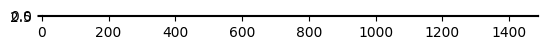

In [77]:
plt.imshow(xenc)

In [78]:
xenc.dtype

torch.float32

In [79]:
W = torch.randn((len(itos), 1))
xenc @ W

tensor([[-0.1569],
        [ 0.5887],
        [-1.0193]])

In [80]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[1.],
        [1.],
        [1.]])

In [81]:
probs[0]

tensor([1.])

In [82]:
probs[0].shape

torch.Size([1])

In [507]:
probs[0].sum()

tensor(1.)

In [ ]:
# (5, 27) @ (27, 27) -> (5, 27)

In [ ]:
# SUMMARY ------------------------------>>>>

In [528]:
xs

tensor([ 0,  5, 13, 13,  1])

In [529]:
ys

tensor([ 5, 13, 13,  1,  0])

In [557]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [558]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [559]:
probs.shape

torch.Size([5, 27])

In [560]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [561]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [565]:
xs

tensor([ 0,  5, 13, 13,  1])

In [566]:
ys

tensor([ 5, 13, 13,  1,  0])

In [580]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [602]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [603]:
print(loss.item())

3.6891887187957764


In [604]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [605]:
W.data += -0.1 * W.grad

In [606]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [682]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [716]:
# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.481828451156616


In [725]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.
